# Extrinsieke camera kalibratie

> Uit vorige opdracht hebben we de intrinsieke camera matrix gehaald, deze zet coördinaten in camera frame om naar pixelcoördinaten. Het definiëren van objecten in het cameraframe is echter niet erg handig. Meestal kan je aan een camera niet echt zien waar het frame zit en kan je moeilijk exacte afstanden meten vanaf de camera. Als we objecten willen definiëren in een meer gebruiksvriendelijk assenstelsel om daarna de punten uit dit assenstelsel te projecteren in camera frame en vervolgens in pixel coördinaten, dan kunnen we dit doen met de extrinsieke camera matrix. Dit is de matrix die metrische coördinaten (U, V, W) in een custom frame omzet in metrische coördinaten (X, Y, Z) in het camera frame. We kunnen dit schrijven in matrix notatie: 

$$\begin{bmatrix} X \\ Y \\ Z \end{bmatrix} = \begin{bmatrix} r_{11} & r_{12} & r_{13} & t_{x} \\ r_{21} & r_{22} & r_{23} & t_{y} \\ r_{31} & r_{32} & r_{33} & t_{z}\\ 0 & 0 & 0 & 1 \end{bmatrix}*\begin{bmatrix} U\\ V \\ W \end{bmatrix}$$ 

> Of ook als:

$$\begin{bmatrix} X \\ Y \\ Z \end{bmatrix} = {}^{w}T_{c} *\begin{bmatrix} U\\ V \\ W \end{bmatrix}$$ 

> Met T zijnde een transformatiematrix die punten omzet van één assenstelsel naar het andere. ${}^{w}T_{c}$ is de rigide transformatie van het {w} frame naar het {c} frame (let op de positie van de indices).



> De extrinsieke camera kalibratie berekent de parameters van deze transformatie op een gelijkaardige manier als bij de intrinsieke kalibratie. We gaan ook een set van metrische coördinaten definiëren op een dambordpatroon. Deze matchen we dan terug met de corresponderende pixelcoördinaten verkregen uit het corner detection algoritme. 









# 1. Importeer bibliotheken

Deze bibliotheken zijn nodig voor het volbrengen van dit script. In de CameraCalibration bibliotheek (die je vindt in de Classes folder op je Google Drive) vind je de code achter de commando's die je hier zal gebruiken. 

In [ ]:
import sys
sys.path.append('/content/drive/My Drive/object_pose_estimation_online')
from Classes.CameraCalibration import *
from google.colab.patches import cv2_imshow

# 2. Importeer alle beelden voor camera kalibratie

> Alle afbeeldingen bevinden zich onder de map /content/drive/My Drive/object_pose_estimation_online/data/camera_calibration_images. Als je dit uitprint kan je zien dat dit een array is met alle 10 de padnamen naar elke afbeelding.

In [ ]:
# Get all image's path names
camera_calibration_images_file = '/content/drive/My Drive/object_pose_estimation_online/data/camera_calibration_images/CC_image_original_*.jpg'
images_path_names = get_image_path_names(camera_calibration_images_file)
print(images_path_names)

['/content/drive/My Drive/object_pose_estimation_online/data/camera_calibration_images/CC_image_original_1.jpg', '/content/drive/My Drive/object_pose_estimation_online/data/camera_calibration_images/CC_image_original_10.jpg', '/content/drive/My Drive/object_pose_estimation_online/data/camera_calibration_images/CC_image_original_2.jpg', '/content/drive/My Drive/object_pose_estimation_online/data/camera_calibration_images/CC_image_original_3.jpg', '/content/drive/My Drive/object_pose_estimation_online/data/camera_calibration_images/CC_image_original_4.jpg', '/content/drive/My Drive/object_pose_estimation_online/data/camera_calibration_images/CC_image_original_5.jpg', '/content/drive/My Drive/object_pose_estimation_online/data/camera_calibration_images/CC_image_original_6.jpg', '/content/drive/My Drive/object_pose_estimation_online/data/camera_calibration_images/CC_image_original_7.jpg', '/content/drive/My Drive/object_pose_estimation_online/data/camera_calibration_images/CC_image_origina



> We kunnen terug kijken hoe een dergelijke afbeelding eruit ziet.



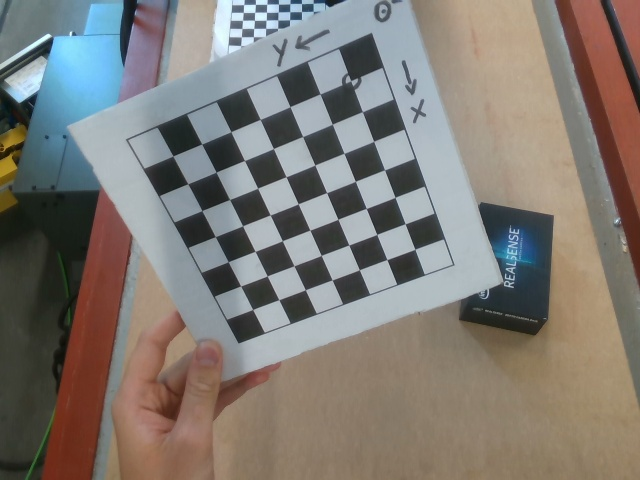

In [ ]:
# Preview image
image_path = images_path_names[0]
image = read_image(image_path)
cv2_imshow(image)

# 4. Laden van de berekende intrinsieke camera matrix

> In vorige opgave heb je de intrinsieke matrix opgeslagen, deze werd automatisch opgeslagen onder /content/drive/My Drive/object_pose_estimation_online/data/matrix_files/intrinsic_camera_properties.npz. Deze kunnen we nu laden. De functie "load_intrinsic_camera_matrix" geeft je niet enkel de intrinsieke matrix, maar ook de distrotiecoëfficiënten nodig voor de kalibratie.





In [ ]:
# Load intrinsic camera matrix and distortion coefficients
intrinsic_camera_matrix_file = '/content/drive/My Drive/object_pose_estimation_online/data/matrix_files/intrinsic_camera_properties.npz'
mtx, dist = load_intrinsic_camera_matrix(intrinsic_camera_matrix_file)

# 5. Extrinsieke camera kalibratie

> Eens we de intrinsieke camera matrix hebben, kunnen we terug de metrische coördinaten van het dambordpatroon definiëren alsook de overeenkomstige pixelcoördinaten detecteren. Als we deze data aan het "extrinsic_calibration" algoritme geven samen met de distortiecoëfficiënten, dan krijgen we hieruit de gewenste extrinsieke matrix. Vervolledig hier terug de nodige stappen om aan de juiste data te komen.




In [ ]:
# Prepare object points in 3D space in meters
objp = get_object_points()

In [ ]:
# Read image
image = read_image(image_path)

In [ ]:
# Turn image to grayscale
gray = image_to_grayscale(image)

In [ ]:
# Find the corners in the chessbord calibration tool
corners = find_corners(gray)

In [ ]:
# Get extrinsic camera calibration matrix (camera-target transform)
ct_transform = extrinsic_calibration(objp, corners, mtx, dist)
print("Camera-target transform: \n\n" + str(ct_transform))

Camera-target transform: 

[[ 0.40493624 -0.91278954  0.05330949  0.05132572]
 [ 0.8502074   0.35443961 -0.38925562 -0.09629704]
 [ 0.33641347  0.20294783  0.91958586  0.38121545]
 [ 0.          0.          0.          1.        ]]


> De bekomen matrix stelt dus de transformatiematrix voor van camera frame {C} naar het dambordframe of targetframe {T}, ${}^{C}T_{T}$. Of in andere woorden, deze matrix kan punten beschreven in het target frame omzetten in het camera frame. 

$$ {}^{C}P = {}^{C}T_{T}*{}^{T}P$$

> Merk op dat de getallen in de laatste kolom van boven naar beneden de x-, y-, en z-positie weergeven van het targetframe ten opzichte van het camera frame. 





# 6. Test camera-target calibration

> In wat volgt kunnen we de kalibratie testen. De extrinsieke matrix geeft ons namelijk weer welke camera coördinaten overeenkomen met objecten gepositioneerd op een bepaalde locatie in het target frame {T}. Samen met de reeds berekende intrinsieke matrix die camera coördinaten omzet in pixel coördinaten kunnen we dus coördinaten van een object die we virtueel plaatsen in het target frame projecteren in pixel frame (dit is de basis van Augmented Reality). Hierbij laden we eerst terug onze berekende intrinsieke camera matrix.



In [ ]:
# Load intrinsic camera matrix and distortion coefficients
intrinsic_camera_matrix_file = "/content/drive/My Drive/object_pose_estimation_online/data/matrix_files/intrinsic_camera_properties.npz"
mtx, dist = load_intrinsic_camera_matrix(intrinsic_camera_matrix_file)

> We definiëren twee zaken:


*   De coordinaten van het target assenstelsel. We definiëren de oorsprong op (X, Y, Z) = (0, 0, 0) in het target frame, de x-as op (X, Y, Z) = (0.6, 0, 0) , de y-as op (X, Y, Z) = (0, 0.6, 0), en de z-as op (X, Y, Z) = (0, 0, 0.6). 
*   De coördinaten van een virtuele kubus van 0.04x0.04x0.04 meter in het target frame. 

> Voor deze beide zaken maken we gebruik van de intrinsieke en extrinsieke matrix om te kijken met welke pixels deze overeenkomen. Als we deze pixels berekenen en projecteren op het beeld, dan krijgen we het effect alsof deze zaken zich werkelijk in de ruimte (gedefiniëerd in target frame) bevinden.

In [ ]:
# Define axis and box coordinates in camera coordinate system
axis = np.float32([[0.06, 0, 0], [0, 0.06, 0], [0, 0, 0.06], [0, 0, 0]])
box = np.float32([[0.08, 0.06, 0], [0.12, 0.06, 0], [0.12, 0.10, 0], [0.08, 0.10, 0], [0.08, 0.06, -0.04],
                          [0.12, 0.06, -0.04], [0.12, 0.10, -0.04], [0.08, 0.10, -0.04]]).reshape(-1, 3)



> Uit de berekende camera-target matrix kunnen we afzonderlijk het rotatie gedeelte en het translatiegedeelte uithalen. Deze dienen we afzonderlijk aan het kalibratie algoritme te geven. 

$${}^{C}T_{T} = \begin{bmatrix} r_{11} & r_{12} & r_{13} & t_{x} \\ r_{21} & r_{22} & r_{23} & t_{y} \\ r_{31} & r_{32} & r_{33} & t_{z}\\ 0 & 0 & 0 & 1 \end{bmatrix} ; {}^{C}R_{T} = \begin{bmatrix} r_{11} & r_{12} & r_{13}\\ r_{21} & r_{22} & r_{23}\\ r_{31} & r_{32} & r_{33}\end{bmatrix} ; {}^{C}t_{T} = \begin{bmatrix} t_{x} \\ t_{y} \\ t_{z}\end{bmatrix}$$





In [ ]:
# Retrieve rotation matrix and translation vector from ct_transform
ct_rot = ct_transform[:3, :3]
ct_trans = ct_transform[0:3, 3]



> Hier projecteren we de gedefiniëerde metrische coördinaten van het assenstelsel (axis) en de kubus (box) beschreven in het target frame, in pixelcoördinaten en tekenen we deze op de afbeelding. 



In [ ]:
# Project 3D axis points to pixel coordinates
imgpts_axis, _ = cv2.projectPoints(axis, ct_rot, ct_trans, mtx, dist)

# Draw axis on image
image = draw_axis(image, imgpts_axis)

# Project 3D box points to pixel coordinates
imgpts_box, _ = cv2.projectPoints(box, ct_rot, ct_trans, mtx, dist)

# Draw box on image
image = draw_box1(image, imgpts_box)



> Het resultaat laat inderdaad zien dat de gedefiniëerde objecten in target frame coördinaten mooi de juiste pixels triggeren om het effect te creëren dat de objecten effectief in de ruimte aanwezig zijn. 



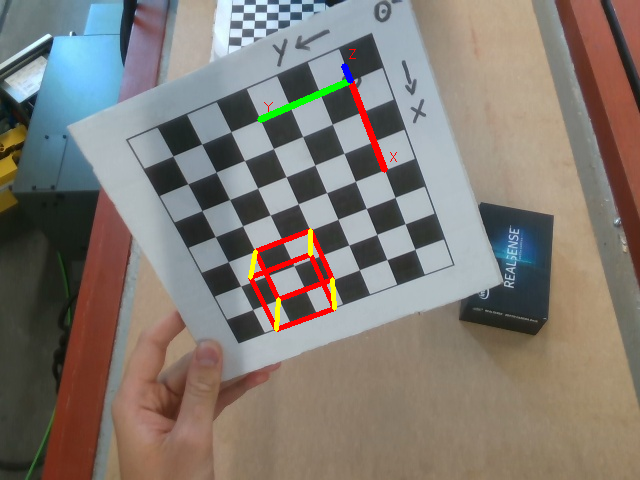

In [ ]:
# Show result
cv2_imshow(image)

> Merk op dat het geplotte frame het target frame {T} voorstelt. De extrinsieke matrix projecteert dus metrische punten in dit coördinatenframe in cameraframe coördinaten. De z-as is hier naar beneden gericht, door het dambordpatroon. De oorsprong bevindt zich rechts bovenaan zoals manueel gedefiniëerd. Je kan zelf wat spelen door de coördinaten van de kubus te veranderen. 